In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:/Users/jwolf/Documents/MEGA/03_Doutoramento/08_Apresentações_publicações/E-Planning')

In [3]:
df_capacitated = pd.read_excel("Custos_por_algoritmos.xlsx", sheet_name="Capacitated_facility", header=0,\
             dtype= {'SubSection': str, 'School': str})

df_k_median = pd.read_excel("Custos_por_algoritmos.xlsx", sheet_name="K_median", header=0,\
dtype= {'SubSection': str, 'School': str})

df_escolas_reais = pd.read_excel("Custos_por_algoritmos.xlsx", sheet_name="Escolas_reais", header=0,\
dtype= {'SubSection': str, 'School': str})

df_capacitated = df_capacitated[:-1]
df_k_median = df_k_median[:-1]
df_escolas_reais = df_escolas_reais[:-1]

In [4]:
df_escolas_reais.head()

,SubSection,Dist,Alunos_alocados_2011,Dist_diaria,Custo
0,01180100101,1.183719,0.387975,0.918506,595.191565
1,01180100102,1.034467,0.969936,2.006735,1300.364269
2,01180100103,0.894086,1.551898,2.775062,1798.239874
3,01180100104,1.020419,0.969936,1.979483,1282.704755
4,01180100105,0.851745,0.387975,0.660910,428.269964


In [5]:
def Adicionar_percenatens (df_gini):
    df_gini['produto_dist_alunos'] = df_gini.Dist * df_gini.Alunos_alocados_2011
    df_gini = df_gini.sort_values(by= 'Dist')
    df_gini['percent_dist'] =  df_gini.produto_dist_alunos / df_gini.produto_dist_alunos.sum()
    df_gini['percent_alunos'] =  df_gini.Alunos_alocados_2011 / df_gini.Alunos_alocados_2011.sum()
    df_gini['Dist_cumsum'] = df_gini.produto_dist_alunos.cumsum()/df_gini.produto_dist_alunos.sum()
    df_gini['Alunos_cumsum'] = df_gini.Alunos_alocados_2011.cumsum()/df_gini.Alunos_alocados_2011.sum()
    return(df_gini)

In [6]:
df_capacitated_2 = Adicionar_percenatens(df_capacitated)
df_k_median_2 = Adicionar_percenatens(df_k_median)
df_escolas_reais_2 = Adicionar_percenatens(df_escolas_reais)

In [7]:
df_capacitated_2.head()

,SubSection,School,Capacity,Alunos_alocados_2011,Custo,Dist,Dist_diaria,produto_dist_alunos,percent_dist,percent_alunos,Dist_cumsum,Alunos_cumsum
481,1181000301,1181000301,225.0,0.775949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000878,0.000000,0.000878
267,1180600225,1180600225,225.0,1.745890,0.000000,0.000000,0.000000,0.000000,0.000000,0.001975,0.000000,0.002853
293,1180700206,1180700206,225.0,1.163920,0.000000,0.000000,0.000000,0.000000,0.000000,0.001317,0.000000,0.004169
268,1180600226,1180600225,225.0,4.461710,491.209739,0.084949,0.758040,0.379020,0.000266,0.005047,0.000266,0.009217
487,1181000307,1181000301,225.0,7.759490,968.518428,0.096310,1.494627,0.747314,0.000525,0.008778,0.000791,0.017994


In [8]:
b = [0]
b[1:] = df_escolas_reais_2.Dist_cumsum
Dist_sum = pd.Series(b)

b2 = [0]
b2[1:] = df_escolas_reais_2.Alunos_cumsum
Alunos_sum = pd.Series(b2)


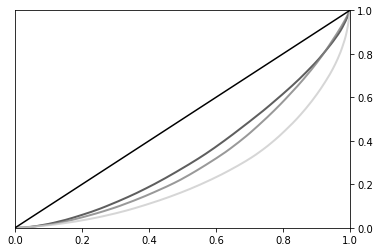

In [9]:
# we need the X values to be between 0.0 to 1.0
# plt.plot(np.linspace(0.0, 1.0, scaled_sum.size), scaled_sum, color = 'grey')
# plt.plot(np.linspace(0.0, 1.0, scaled_sum.size), scaled_sum, color = 'grey')
fig, ax = plt.subplots(1) 
ax.plot(df_k_median_2.Alunos_cumsum, df_k_median_2.Dist_cumsum, \
         linewidth=2, markersize=2, color = (0.1,0.1,0.1, 0.7))
ax.plot(df_escolas_reais_2.Alunos_cumsum, df_escolas_reais_2.Dist_cumsum, \
         linewidth=2, markersize=2, color = (0.5,0.5,0.5, 0.8))
ax.plot(df_capacitated_2.Alunos_cumsum, df_capacitated_2.Dist_cumsum, \
         linewidth=2, markersize=2, color = (0.8,0.8,0.8, 0.8))
# plot the straight line perfect equality curve
ax.plot([0,1], [0,1], color = 'black')
ax.set_xlim(left = 0, right = 1)
ax.set_ylim(bottom=0, top = 1)

# Hide the right and top spines
# ax.spines['left'].set_visible(False)
# ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('right')

plt.show(fig)

In [10]:
df_capacitated.head()


,SubSection,School,Capacity,Alunos_alocados_2011,Custo,Dist,Dist_diaria,produto_dist_alunos
0,1180100101,1181000301,225.0,0.387975,2135.730971,4.247543,3.295881,1.647941
1,1180100102,1181000301,225.0,0.969936,2083.011364,1.657080,3.214524,1.607262
2,1180100103,1181000301,225.0,1.551900,2335.366713,1.161145,3.603961,1.801980
3,1180100104,1181000301,225.0,0.969936,3073.933414,2.445380,4.743724,2.371862
4,1180100105,1181000301,225.0,0.387975,2696.564286,5.362929,4.161365,2.080682


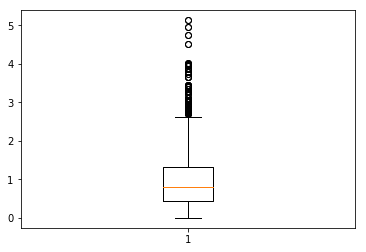

In [12]:
def repeated_rows (variable, weights): 
    weighted_appearances = []
    for i in variable: 
        
for index, row in df_capacitated.iterrows():
    weighted_row = [row.Dist]*int(row.Alunos_alocados_2011)
    weighted_appearances += weighted_row
for index, row in df_capacitated.iterrows():
    weighted_row = [row.Dist]*int(row.Alunos_alocados_2011)
    weighted_appearances += weighted_row

plt.boxplot(weighted_appearances)
plt.show()
# weighted_appearances = []
# for index, row in df.iterrows():
#     weighted_row = [row.ColA]*row.ColA_weights
#     weighted_appearances += weighted_row

# plt.boxplot(weighted_appearances)
# plt.show()

In [ ]:
data_to_plot = (df_capacitated.Dist, df_capacitated.Alunos_alocados_2011)

# Create a figure instance
fig = plt.figure(1, figsize=(9, 4))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

# add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='grey', linewidth=2)
    # change fill color
    box.set( facecolor = 'grey' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='black', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='black', linewidth=1)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
   
ax.set_xticklabels(['Sample1', 'Sample2'])

#Save the figure
#fig.savefig('fig1.png', bbox_inches='tight')

In [ ]:
 np.average(df_capacitated.Dist,  weights = df_capacitated.Alunos_alocados_2011)

In [ ]:
df_capacitated.head()

In [ ]:
scaled_sum = df_capacitated.Dist.cumsum() / df_capacitated.Dist.sum()
ordered = df_capacitated.Alunos_alocados.sort_values()
scaled_sum_2 = ordered.cumsum() / ordered.sum()

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, scaled_sum.size), scaled_sum, color = 'grey')
plt.plot(np.linspace(0.0, 1.0, scaled_sum_2.size), scaled_sum_2, color = 'grey')

# plot the straight line perfect equality curve
plt.plot([0,1], [0,1], color = 'black')
plt.show()



In [ ]:
dates = pd.date_range('20190101', periods=6)
dates